In [2]:
#import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("Social_Network_Ads.csv")

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [9]:
#plots elbow chart on the data provided 
def elbowOptimizer(df):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11),wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [10]:
#training kmean model

def trainKmean(n,df):
    kmeans = KMeans(n_clusters = n, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df)
    return (kmeans,labels)

In [11]:
X = df.iloc[:,[2,3]].values

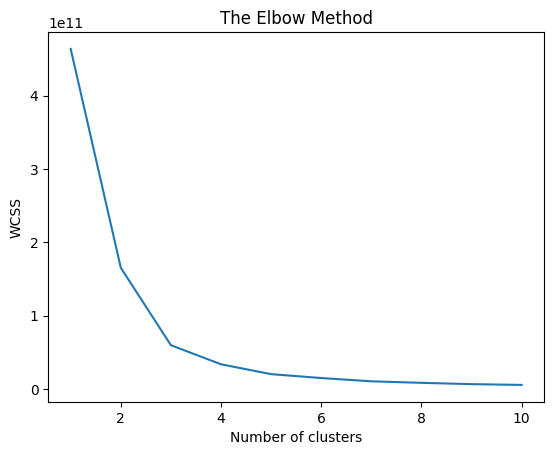

In [12]:
elbowOptimizer(X)

In [13]:
kmeans, labels = trainKmean(3,X)
kmeans

KMeans(n_clusters=3, random_state=42)

In [14]:
labels

array([1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1,

In [15]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


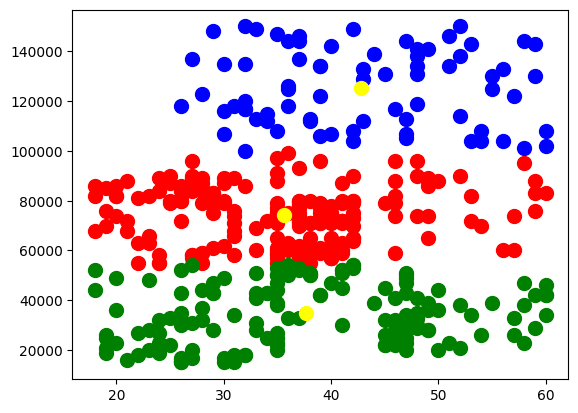

In [16]:
plt.scatter(X[labels==0,0],X[labels==0,1],s=100,c='red',label="cluster 1")
plt.scatter(X[labels==1,0],X[labels==1,1],s=100,c='green',label="cluster 2")
plt.scatter(X[labels==2,0],X[labels==2,1],s=100,c='blue',label="cluster 3")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label="centroids")
plt.show()